In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
df=pd.read_csv('tracks.csv')
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0


In [3]:
df['popularity'].unique()

array([ 6,  0,  1,  4, 41, 38, 30, 28, 27, 26, 25, 23, 22, 20, 18, 17, 16,
       15, 14, 11, 10,  8,  9,  5,  7,  2, 39, 33, 32, 24, 21, 19, 13, 12,
        3, 51, 48, 40, 34, 29, 47, 43, 37, 35, 31, 55, 50, 36, 42, 65, 53,
       45, 49, 46, 44, 52, 56, 54, 61])

In [4]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,19798.000000,1.979800e+04,19798.000000,19798.000000,19798.000000,19798.000000,19798.000000,19798.000000,19798.000000,19798.000000,19798.000000,19798.000000,19798.000000,19798.000000,19797.000000
mean,2.306193,2.043118e+05,0.002576,0.545826,0.270603,5.100111,-15.078783,0.712244,0.221591,0.871056,0.309512,0.216351,0.557762,110.215214,3.749659
std,5.791890,1.475477e+05,0.050690,0.170170,0.163781,3.463034,5.436974,0.452728,0.323215,0.207554,0.381783,0.158502,0.249358,31.261457,0.693375
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.547848e+05,0.000000,0.419000,0.158000,2.000000,-18.800000,0.000000,0.042600,0.855000,0.000004,0.112000,0.369000,84.921250,4.000000
50%,0.000000,1.810670e+05,0.000000,0.575000,0.242000,5.000000,-14.451000,1.000000,0.061400,0.968000,0.028400,0.158000,0.587000,108.586000,4.000000
75%,1.000000,2.014368e+05,0.000000,0.687000,0.345000,8.000000,-11.124250,1.000000,0.165000,0.991000,0.764750,0.274000,0.759000,127.525000,4.000000
max,65.000000,3.499774e+06,1.000000,0.957000,1.000000,11.000000,3.855000,1.000000,0.969000,0.996000,0.999000,0.986000,1.000000,221.741000,5.000000


Identifying the features that contribute to the classification output label

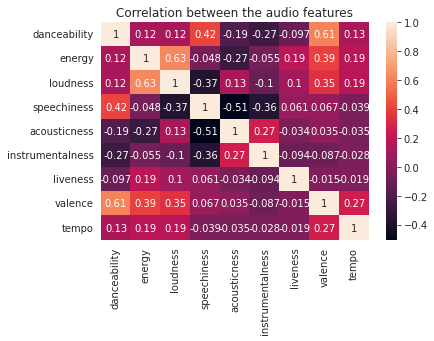

In [5]:
corr = df[['danceability', 
                  'energy', 
                  'loudness', 
                  'speechiness', 
                  'acousticness', 
                  'instrumentalness', 
                  'liveness',
                  'valence', 
                  'tempo' ]].corr()
# plt.figsize(14,12)
plt.title('Correlation between the audio features')
sns.heatmap(corr, annot=True);

The latest songs are having high popularity when compared to old songs

In [6]:
px.scatter(df, x='release_date', y='popularity', title='Release Date vs Popularity')

we could see the latest songs are having more popularity compared to old songs

Lets create a new column year based on release date as we could see the data is inconsistently having date or year for some songs 

In [7]:
def to_year(x):
    result = []
    x.to_string()
    for i in x:
        result.append(int(i[:4]))
    return result

df['year'] = to_year(df.release_date)

In [8]:
df['year'].unique()

array([1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946])

Along with the year column we can also add information about how old the song is at present. For that we will find the max value of year and calculate it's difference with every other row

In [9]:
max_year = df['year'].max()
df['years_old'] = max_year - df['year']
df['years_old'].sample(10)

8967     12
605      23
17355     3
3331     19
7057     15
7082     15
17816     2
5169     17
12589     8
14486     6
Name: years_old, dtype: int64

In [10]:
df['tempo'].value_counts()

0.000      31
120.447     5
129.452     5
85.942      4
125.045     4
           ..
89.408      1
128.937     1
99.111      1
181.620     1
74.515      1
Name: tempo, Length: 17357, dtype: int64

The tempo column contains many zero values. We will replace the zero values with the mean of all the other non-zero values in the dataset.

In [11]:
df.loc[df['tempo'] == 0 , 'tempo'] = df.loc[df['tempo'] > 0 , 'tempo'].mean()

df['tempo'].value_counts()

110.388061    31
120.447000     5
129.452000     5
85.942000      4
125.045000     4
              ..
89.408000      1
128.937000     1
99.111000      1
181.620000     1
74.515000      1
Name: tempo, Length: 17357, dtype: int64

The artist of the song can have a large impact on the popularity of the song. So we will add a new column artist_popularity containing the artist's mean popularity. For that we will also need the mean and count columns.

In [12]:
df['mean'] = df.groupby('artists')['popularity'].transform('mean')
df['count'] = df.groupby('artists')['popularity'].transform('count')

In [13]:
def get_artist_popularity(x, y):
  result = y.groupby(x.artists).agg(['mean', 'count'])
  result.loc[result['count'] <= 2, 'mean'] = y.mean()
  result.loc[result['count'] >= 600, 'mean'] = 0
  return result

In [14]:
temp_df = df.drop('popularity', axis=1)
result_df = get_artist_popularity(temp_df, df['popularity'])['mean']
df['artist_popularity'] = np.where(df['artists'].isin(result_df.index), 
                                          df['artists'], 
                                          'unknown')
df['artist_popularity'] = df['artist_popularity'].map(result_df)

In [15]:
df[['artists', 'artist_popularity']].sample(10)

,artists,artist_popularity
18146,['Lata Mangeshkar'],2.700000
16569,['Noor Jehan'],0.692308
3333,['Sonny Davis'],0.000000
755,['Mistinguett'],0.043478
5962,['Boscoe Holders'],2.306193
17816,['Frank Sinatra'],18.446429
11618,"['Billie Holiday', 'Teddy Wilson']",13.487179
7916,['Tadeusz Dolega Mostowicz'],0.000000
16749,['Mohammed Abdel Wahab'],1.400000
9807,"['Sinclair Lewis', 'Frank Arnold']",0.081871


We have identified 2 latent variables and added them into our dataframe through computation.

Artists Popularity Years old (The songs released more recently have higher popularity)



In [16]:
df['pop_bins'] = pd.cut(x=df['popularity'], bins=[-1, 49, 100])
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,liveness,valence,tempo,time_signature,year,years_old,mean,count,artist_popularity,pop_bins
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,0.151,0.127,104.851,3.0,1922,24,1.000000,6,1.000000,"(-1, 49]"
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,0.148,0.655,102.009,1.0,1922,24,0.000000,50,0.000000,"(-1, 49]"
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,0.212,0.457,130.418,5.0,1922,24,0.066038,530,0.066038,"(-1, 49]"
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,0.104,0.397,169.980,3.0,1922,24,0.066038,530,0.066038,"(-1, 49]"
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0.311,0.196,103.220,4.0,1922,24,2.687500,32,2.687500,"(-1, 49]"


In [17]:
df['pop_bins'].unique()

[(-1, 49], (49, 100]]
Categories (2, interval[int64, right]): [(-1, 49] < (49, 100]]

In [18]:
df['pop_bins'].isna().sum()

0

In [19]:
df['popular'] = pd.cut(x=df['popularity'], bins=[-1, 49, 100], labels=[0, 1])
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,valence,tempo,time_signature,year,years_old,mean,count,artist_popularity,pop_bins,popular
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,0.127,104.851,3.0,1922,24,1.000000,6,1.000000,"(-1, 49]",0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,0.655,102.009,1.0,1922,24,0.000000,50,0.000000,"(-1, 49]",0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,0.457,130.418,5.0,1922,24,0.066038,530,0.066038,"(-1, 49]",0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,0.397,169.980,3.0,1922,24,0.066038,530,0.066038,"(-1, 49]",0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0.196,103.220,4.0,1922,24,2.687500,32,2.687500,"(-1, 49]",0


In [20]:
df['popular'].value_counts(normalize=True)

0    0.998889
1    0.001111
Name: popular, dtype: float64

Feature Selection

In [21]:
input_columns = ['years_old', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 
                 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
                 'liveness', 'valence', 'tempo', 'time_signature', 'artist_popularity']

target_column = 'popular'

We have two columns that are categorical and we can use one hot encoder to convert the categorical variables

In [22]:
df['key'].value_counts()

0     2212
5     2143
7     2141
1     2067
2     1761
9     1706
10    1653
3     1395
8     1390
4     1229
6     1107
11     994
Name: key, dtype: int64

In [23]:
df['time_signature'].value_counts()

4.0    14080
3.0     4115
5.0      999
1.0      572
0.0       31
Name: time_signature, dtype: int64

Training, Validation and Test Split

In [24]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)
print('train_df', train_df.shape)
print('val_df', val_df.shape)
print('test_df', test_df.shape)

train_df (11878, 27)
val_df (3960, 27)
test_df (3960, 27)


In [25]:
train_inputs = train_df[input_columns].copy()
val_inputs = val_df[input_columns].copy()
test_inputs = test_df[input_columns].copy()

In [26]:
Y_train = train_df[target_column].copy()
Y_val = val_df[target_column].copy()
Y_test = test_df[target_column].copy()

In [27]:
df[input_columns].isna().sum()

years_old            0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       1
artist_popularity    0
dtype: int64

scaling the columns

In [28]:
numeric_cols = ['years_old', 'duration_ms', 'explicit', 'danceability', 'energy', 
                'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
                'liveness', 'valence', 'tempo', 'artist_popularity']
categorical_cols = ['key', 'time_signature']

In [29]:
scaler = MinMaxScaler().fit(df[numeric_cols])

In [30]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

One-hot encoder

In [31]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [32]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [33]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [34]:
X_train.columns

Index(['years_old', 'duration_ms', 'explicit', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'artist_popularity', 'key_0', 'key_1',
       'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9',
       'key_10', 'key_11', 'time_signature_0.0', 'time_signature_1.0',
       'time_signature_3.0', 'time_signature_4.0', 'time_signature_5.0',
       'time_signature_nan'],
      dtype='object')

Classification Task

we are going to perform Muller Classification Loop using the 5 classification algorithms.

1.DecisionTree
2.RandomForest
3.AdaBoost
4.GradientBoosting
5.KNN

In [35]:
names = ["DecisionTree", "RandomForest", "AdaBoost", "GradientBoosting"]#, "KNN"]
classifiers = [DecisionTreeClassifier(), 
               RandomForestClassifier(),
               AdaBoostClassifier(),
               GradientBoostingClassifier(),
              #  KNeighborsClassifier()
               ]
clf_models = {}

In [36]:
for name, clf in zip(names, classifiers):
  model = clf.fit(X_train, Y_train)
  clf_models[name] = model
  acc = clf.score(X_test, Y_test)
  print('The accuracy for ',name,'is ', acc*100, '%')

The accuracy for  DecisionTree is  99.77272727272727 %
The accuracy for  RandomForest is  99.8989898989899 %
The accuracy for  AdaBoost is  99.84848484848486 %
The accuracy for  GradientBoosting is  99.74747474747475 %
The accuracy for  KNN is  99.8989898989899 %


We could see the accuracy for all the 5 classification algorithms, and GradientBoosting performed better out of 5
The Accuracy of RandomForest and AdaBoost are almost same